# Loaded 2013 data:
## Achieved the following:
- combined/merged opp_shot_range, shot_range, player averages, unnassisted stats, player-bios, schedule
- dropped unnecessary columns
- created a heat map to find correlation between variables
- plot GP vs other variables


### note: 
- Shorter seasons due to Lockout: Season 1998-99 and 2011-12.
- For players traded midseason:
    - If a player traded to a different team mid-season the TEAM_NAME and TEAM_ABBREVIATION is recorded as the team the player was traded to is 
    

In [128]:
opp_shot_file = '../datasets/opponent_shot_range/opp_shot_range%s.csv'
shot_sel_file = '../datasets/shot_range/shot_range%s.csv'
avg_file = '../datasets/player_avgs/player_average_%s.csv'
unassisted_file = '../datasets/unassisted_stats/unassisted_stats%s.csv'
bios_file = '../datasets/player_bios/player_bios%s.csv'
schedule_file = '../datasets/team_schedule/team_schedule%s.csv'
pace_pie_file = '../datasets/pace_pie/pace_pie%s.csv'
files = [opp_shot_file,shot_sel_file, avg_file,unassisted_file, bios_file, schedule_file, pace_pie_file]

In [129]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# all_2015 = is a list of data frames of player stats in 2015.  
# The list is in order: opponent shooting range, shooting range,  
        # players_avg, unassisted_stats, player_bios, schedule, pace_pie
all_2015 = []

for f in files:
    csv_file = f % '2015-16'
    df = pd.read_csv(csv_file)
    all_2015.append(df)

for df in all_2015:
    df.drop([x for x in df.columns if x.startswith('Unnamed:')], axis=1,inplace=True)
    print df.shape, df.columns
    print "==========="

(476, 33) Index([u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID', u'TEAM_ABBREVIATION', u'AGE',
       u'opp_lessthan5ft_FGM', u'opp_lessthan5ft_FGA',
       u'opp_lessthan5ft_FG_PCT', u'opp_5_9ft_FGM', u'opp_5_9ft_FGA',
       u'opp_5_9ft_FG_PCT', u'opp_10_14ft_FGM', u'opp_10_14ft_FGA',
       u'opp_10_14ft_FG_PCT', u'opp_15_19ft_FGM', u'opp_15_19ft_FGA',
       u'opp_15_19ft_FG_PCT', u'opp_20_24ft_FGM', u'opp_20_24ft_FGA',
       u'opp_20_24ft_FG_PCT', u'opp_25_29ft_FGM', u'opp_25_29ft_FGA',
       u'opp_25_29ft_FG_PCT', u'opp_30_34ft_FGM', u'opp_30_34ft_FGA',
       u'opp_30_34ft_FG_PCT', u'opp_35_39ft_FGM', u'opp_35_39ft_FGA',
       u'opp_35_39ft_FG_PCT', u'opp_40aboveft_FGM', u'opp_40aboveft_FGA',
       u'opp_40aboveft_FG_PCT', u'SEASON'],
      dtype='object')
[2015]
(476, 33) Index([u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID', u'TEAM_ABBREVIATION', u'AGE',
       u'lessthan5ft_FGM', u'lessthan5ft_FGA', u'lessthan5ft_FG_PCT',
       u'5_9ft_FGM', u'5_9ft_FGA', u'5_9ft_FG_PCT', u'10_14ft_

In [141]:
# Merged data frames
merged_shot_selection = pd.merge(all_2015[0], all_2015[1], 
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'SEASON'])
merged_avg_assisted = pd.merge(all_2015[2], all_2015[3], 
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP','W', 'L', 'W_PCT', 'MIN', 'SEASON'])
merge_bios_schedule =  pd.merge(all_2015[4], all_2015[5], on=['TEAM_ABBREVIATION'])
all_merged = pd.merge(merged_avg_assisted, merged_shot_selection,
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'SEASON']).merge(merge_bios_schedule, 
            on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'SEASON']).merge(all_2015[6], 
            on=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'])

# 35ft and above, double-double and triple-double count are dropped 
drop_columns = ['35_39ft_FGA','35_39ft_FG_PCT', '40aboveft_FGM', '40aboveft_FGA','40aboveft_FG_PCT', 'opp_35_39ft_FGM',
 'opp_35_39ft_FGA','opp_35_39ft_FG_PCT', 'opp_40aboveft_FGM', 'opp_40aboveft_FGA', 'opp_40aboveft_FG_PCT', 'CFID_x','CFID_y',
    'CFPARAMS_x', 'CFPARAMS_y', 'DD2', 'TD3']

all_merged.drop(drop_columns, axis=1, inplace=True)

In [142]:
all_merged.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,NET_RATING,USG_PCT,TS_PCT,B2B_COUNT,3GMS_IN_4DAYS,4GMS_IN_5DAYS,PACE,PIE
0,201166,Aaron Brooks,1610612741,CHI,31.0,69,36,33,0.522,16.1,...,72,161,-1.4,0.231,0.494,17,24,1,97.22,0.073
1,203932,Aaron Gordon,1610612753,ORL,20.0,78,32,46,0.410,23.9,...,81,220,-1.3,0.171,0.541,19,27,1,98.87,0.113
2,1626151,Aaron Harrison,1610612766,CHA,21.0,21,15,6,0.714,4.4,...,78,210,2.2,0.138,0.371,16,24,0,102.89,0.013
3,203940,Adreian Payne,1610612750,MIN,25.0,52,18,34,0.346,9.3,...,82,237,-10.8,0.180,0.422,14,22,2,96.48,0.039
4,201143,Al Horford,1610612737,ATL,30.0,82,48,34,0.585,32.1,...,82,245,4.9,0.206,0.565,19,27,2,99.75,0.137


In [143]:
all_merged.columns.tolist()

['PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'AGE',
 'GP',
 'W',
 'L',
 'W_PCT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'SEASON',
 'PCT_FGA_2PT',
 'PCT_FGA_3PT',
 'PCT_PTS_2PT',
 'PCT_PTS_2PT_MR',
 'PCT_PTS_3PT',
 'PCT_PTS_FB',
 'PCT_PTS_FT',
 'PCT_PTS_OFF_TOV',
 'PCT_PTS_PAINT',
 'PCT_AST_2PM',
 'PCT_UAST_2PM',
 'PCT_AST_3PM',
 'PCT_UAST_3PM',
 'PCT_AST_FGM',
 'PCT_UAST_FGM',
 'opp_lessthan5ft_FGM',
 'opp_lessthan5ft_FGA',
 'opp_lessthan5ft_FG_PCT',
 'opp_5_9ft_FGM',
 'opp_5_9ft_FGA',
 'opp_5_9ft_FG_PCT',
 'opp_10_14ft_FGM',
 'opp_10_14ft_FGA',
 'opp_10_14ft_FG_PCT',
 'opp_15_19ft_FGM',
 'opp_15_19ft_FGA',
 'opp_15_19ft_FG_PCT',
 'opp_20_24ft_FGM',
 'opp_20_24ft_FGA',
 'opp_20_24ft_FG_PCT',
 'opp_25_29ft_FGM',
 'opp_25_29ft_FGA',
 'opp_25_29ft_FG_PCT',
 'opp_30_34ft_FGM',
 'opp_30_34ft_FGA',
 'opp_30_34ft_FG_

In [149]:
# need to handle null values for each column
for col in all_merged.columns:
    print col
    print all_merged[col].isnull().sum()
    if all_merged[col].isnull().sum() > 0:
        print all_merged[all_merged[col].isnull()][['PLAYER_NAME','GP', 'TEAM_ABBREVIATION']]
    print "================"

PLAYER_ID
0
PLAYER_NAME
0
TEAM_ID
0
TEAM_ABBREVIATION
0
AGE
0
GP
0
W
0
L
0
W_PCT
0
MIN
0
FGM
0
FGA
0
FG_PCT
0
FG3M
0
FG3A
0
FG3_PCT
0
FTM
0
FTA
0
FT_PCT
0
OREB
0
DREB
0
REB
0
AST
0
TOV
0
STL
0
BLK
0
BLKA
0
PF
0
PFD
0
PTS
0
PLUS_MINUS
0
SEASON
0
PCT_FGA_2PT
0
PCT_FGA_3PT
0
PCT_PTS_2PT
0
PCT_PTS_2PT_MR
0
PCT_PTS_3PT
0
PCT_PTS_FB
0
PCT_PTS_FT
0
PCT_PTS_OFF_TOV
0
PCT_PTS_PAINT
0
PCT_AST_2PM
0
PCT_UAST_2PM
0
PCT_AST_3PM
0
PCT_UAST_3PM
0
PCT_AST_FGM
0
PCT_UAST_FGM
0
opp_lessthan5ft_FGM
0
opp_lessthan5ft_FGA
0
opp_lessthan5ft_FG_PCT
0
opp_5_9ft_FGM
0
opp_5_9ft_FGA
0
opp_5_9ft_FG_PCT
0
opp_10_14ft_FGM
0
opp_10_14ft_FGA
0
opp_10_14ft_FG_PCT
0
opp_15_19ft_FGM
0
opp_15_19ft_FGA
0
opp_15_19ft_FG_PCT
0
opp_20_24ft_FGM
0
opp_20_24ft_FGA
0
opp_20_24ft_FG_PCT
0
opp_25_29ft_FGM
1
      PLAYER_NAME  GP TEAM_ABBREVIATION
173  J.J. O'Brien   2               UTA
opp_25_29ft_FGA
1
      PLAYER_NAME  GP TEAM_ABBREVIATION
173  J.J. O'Brien   2               UTA
opp_25_29ft_FG_PCT
1
      PLAYER_NAME  GP TEAM_

In [148]:
# players traded midseason have assigned TEAM_ABB and team name as the team they were traded to.
# total GP is added throughout year regardless of which team he played for.
print all_merged.shape
all_merged[all_merged['PLAYER_NAME'] == 'Anderson Varejao']

(476, 100)


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,NET_RATING,USG_PCT,TS_PCT,B2B_COUNT,3GMS_IN_4DAYS,4GMS_IN_5DAYS,PACE,PIE
17,2760,Anderson Varejao,1610612744,GSW,33.0,53,41,12,0.774,9.4,...,83,273,-0.5,0.147,0.473,20,26,0,98.15,0.08


In [165]:
print all_merged.shape
print all_merged[all_merged.MIN > 10.].shape
print all_merged[all_merged.GP > 30].shape

(476, 100)
(397, 100)
(380, 100)


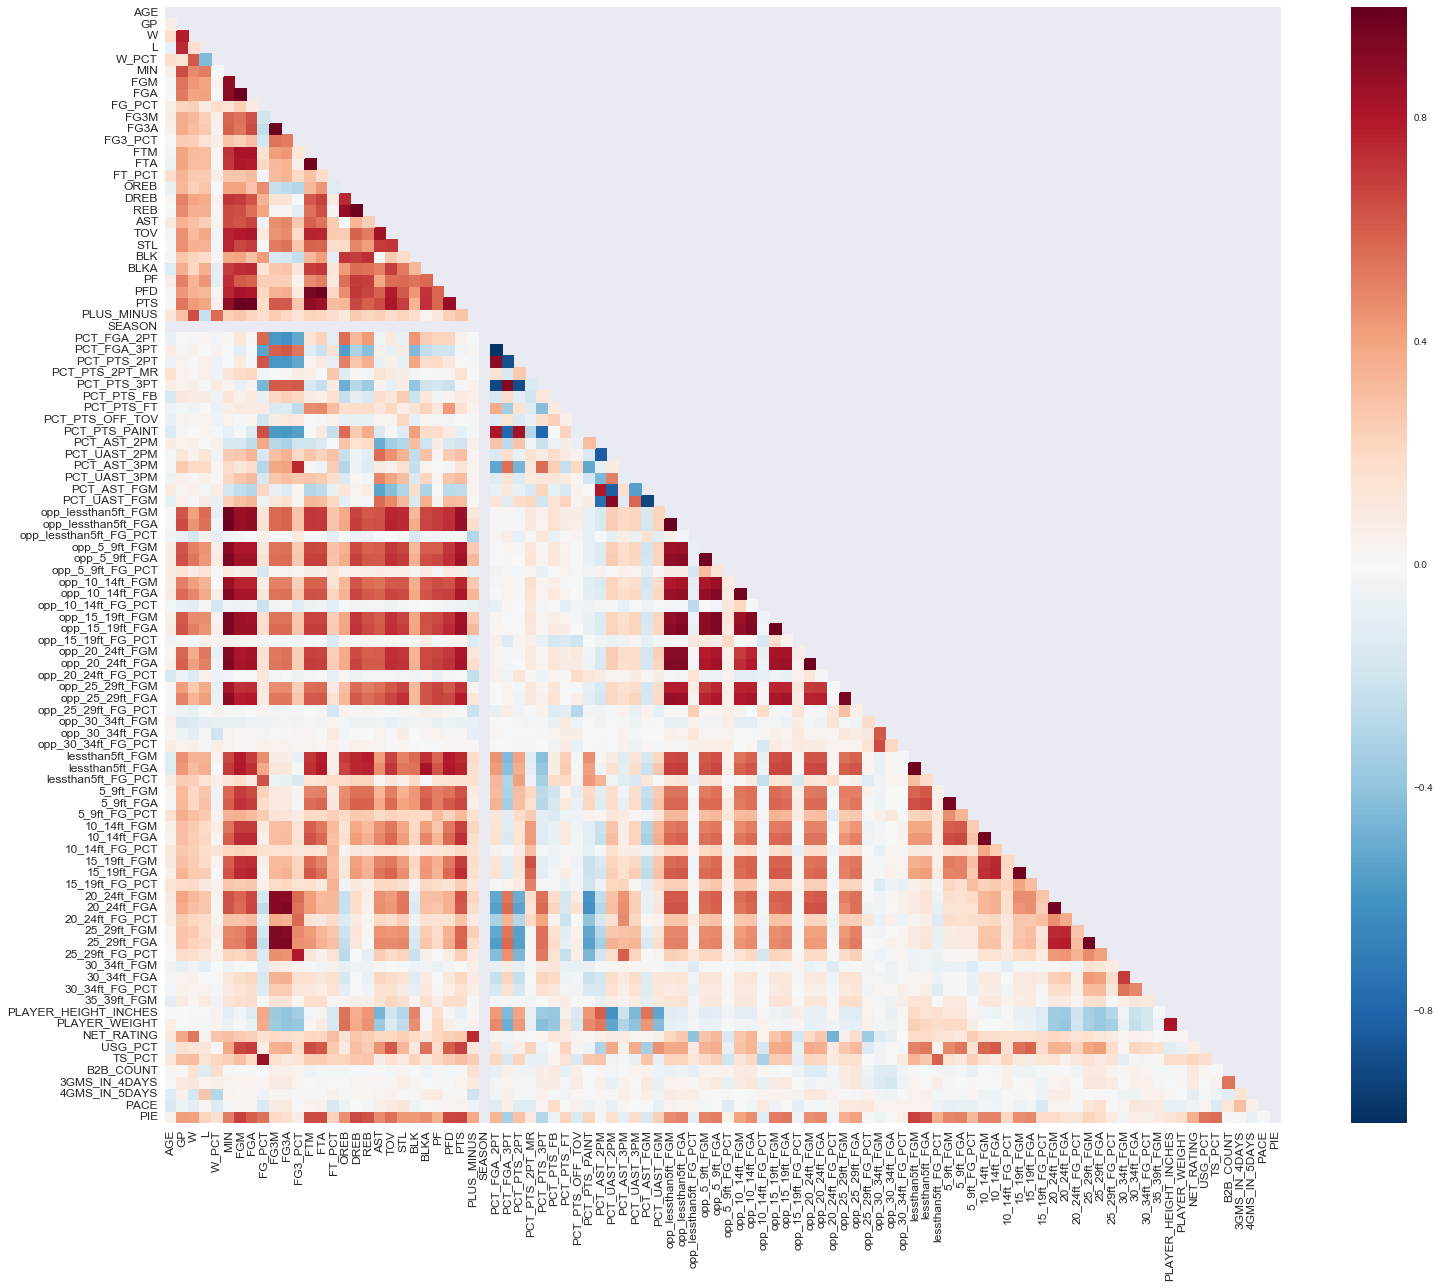

In [150]:
all_corr = all_merged.iloc[:,3:].corr()

# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(25,20)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(all_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(all_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


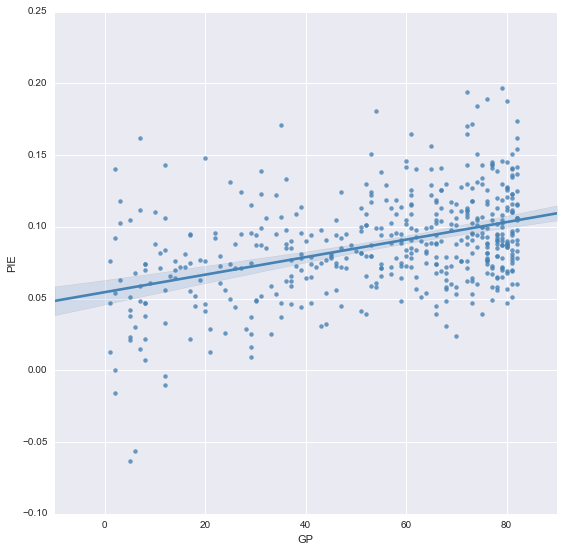

In [166]:
# columns highly correlated with GP: W, 
fig = plt.figure(figsize=(9,9))
ax = fig.gca()

ax = sns.regplot(all_merged.GP, all_merged.PIE, fit_reg=True, color='steelblue', ax=ax)

# ax.set_title('Business zone % vs underclass %')
plt.show()

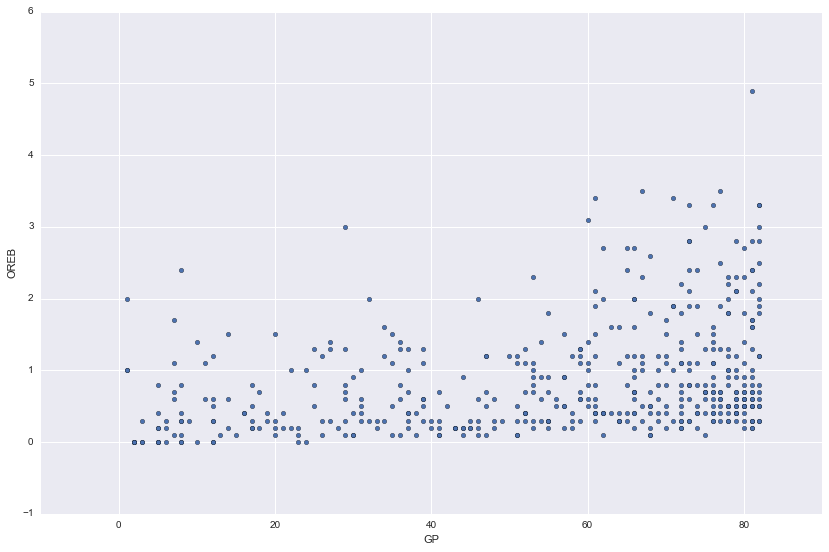

In [158]:
fig = plt.figure(figsize=(14,9))
ax = fig.gca()
all_merged.plot(x='GP', y=all_merged.columns[19], kind='scatter',ax=ax)
plt.show()

In [182]:
# subset players that played 20 min or greater
min_gp = all_merged[(all_merged.MIN > 10) & (all_merged.GP > 10)]
print min_gp.shape
print all_merged.shape

(387, 100)
(476, 100)


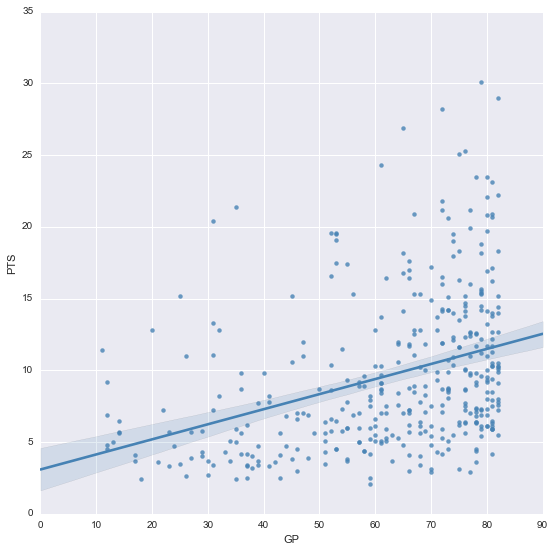

In [183]:
# columns highly correlated with GP: W, 
fig = plt.figure(figsize=(9,9))
ax = fig.gca()

ax = sns.regplot(min_gp.GP, min_gp.PTS, fit_reg=True, color='steelblue', ax=ax)

# ax.set_title('Business zone % vs underclass %')
plt.show()